In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
train=pd.read_csv('/content/drive/MyDrive/own_data/spaceship.csv')

In [4]:
train['Transported'].value_counts(normalize=True)*100

True     50.362361
False    49.637639
Name: Transported, dtype: float64

In [5]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [6]:
test=pd.read_csv('/content/drive/MyDrive/own_data/spaceship_test.csv')

In [7]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [8]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [9]:
train_label=train['PassengerId']

In [10]:
train_label

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [11]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
train.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [13]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [14]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [15]:
test.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [16]:
test.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [17]:
train.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [18]:
cat_cols=train.select_dtypes(include=['object','bool']).columns
train[cat_cols]=train[cat_cols].astype('category')

In [19]:
train.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Transported     category
dtype: object

In [20]:
cat_cols=test.select_dtypes(include=['object','bool']).columns
test[cat_cols]=test[cat_cols].astype('category')

In [21]:
test.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

In [22]:
cols=['Transported']
train_tar=pd.get_dummies(columns=cols,data=train,prefix=cols,prefix_sep='_',drop_first=True)

In [23]:
train_tar

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_True
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


In [24]:
x=train_tar.drop('Transported_True',axis=1)
y=train_tar['Transported_True']

In [25]:
x.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [26]:
x.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y, random_state=1234)

In [28]:
x_train.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

In [29]:
test.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

In [32]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3895,Mars,False,TRAPPIST-1e,19.0,False,154.0,170.0,2074.0,0.0,0.0
905,Earth,False,TRAPPIST-1e,24.0,False,NaN,32.0,8.0,0.0,0.0
8021,Mars,False,TRAPPIST-1e,50.0,False,748.0,164.0,269.0,0.0,0.0
617,Europa,True,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0
4369,Europa,False,TRAPPIST-1e,33.0,False,0.0,7039.0,0.0,902.0,405.0
...,...,...,...,...,...,...,...,...,...,...
3532,Mars,False,TRAPPIST-1e,NaN,False,132.0,75.0,849.0,0.0,0.0
2090,Earth,False,TRAPPIST-1e,27.0,False,203.0,539.0,0.0,0.0,0.0
2342,Mars,True,TRAPPIST-1e,20.0,NaN,0.0,0.0,0.0,0.0,0.0
900,Earth,True,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
    
num_attr = x_train.select_dtypes(['int','float']).columns
imputer = imputer.fit(x_train[num_attr])
    
x_train[num_attr] = imputer.transform(x_train[num_attr])
x_test[num_attr] = imputer.transform(x_test[num_attr])
test[num_attr]=imputer.transform(test[num_attr])

In [40]:
x_train.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

In [41]:
cat_cols=x_train.select_dtypes(include=['object','bool']).columns
x_train[cat_cols]=x_train[cat_cols].astype('category')

In [42]:
x_train.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

In [43]:
cat_cols=x_test.select_dtypes(include=['object','bool']).columns
x_test[cat_cols]=x_test[cat_cols].astype('category')

In [44]:
x_test.dtypes

HomePlanet      category
CryoSleep       category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

In [45]:
cat_cols=test.select_dtypes(include=['object','bool']).columns
test[cat_cols]=test[cat_cols].astype('category')

In [46]:
x_train.isna().sum(axis=0)

HomePlanet      141
CryoSleep       140
Destination     133
Age               0
VIP             153
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [47]:
test.isna().sum(axis=0)

HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

In [48]:
cat_cols=x_train.select_dtypes(include=['category']).columns

In [49]:
x_train=pd.get_dummies(columns=cat_cols,data=x_train,prefix=cat_cols,prefix_sep='_',drop_first=True)

In [50]:
x_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
3895,19.000000,154.000000,170.0,2074.0,0.0,0.0,0,1,0,0,1,0
905,24.000000,221.402757,32.0,8.0,0.0,0.0,0,0,0,0,1,0
8021,50.000000,748.000000,164.0,269.0,0.0,0.0,0,1,0,0,1,0
617,30.000000,0.000000,0.0,0.0,0.0,0.0,1,0,1,0,0,0
4369,33.000000,0.000000,7039.0,0.0,902.0,405.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,28.911913,132.000000,75.0,849.0,0.0,0.0,0,1,0,0,1,0
2090,27.000000,203.000000,539.0,0.0,0.0,0.0,0,0,0,0,1,0
2342,20.000000,0.000000,0.0,0.0,0.0,0.0,0,1,1,0,1,0
900,19.000000,0.000000,0.0,0.0,0.0,0.0,0,0,1,0,1,0


In [51]:
cat_cols=x_test.select_dtypes(include=['category']).columns

In [52]:
x_test=pd.get_dummies(columns=cat_cols,data=x_test,prefix=cat_cols,prefix_sep='_',drop_first=True)

In [53]:
x_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
1048,9.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
1895,15.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
5522,30.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0
2641,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4287,42.0,4102.0,0.0,36.0,0.0,1825.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4153,36.0,721.0,0.0,471.0,0.0,0.0,0,1,0,0,1,0
7458,18.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0
7644,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
6682,21.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler

In [55]:
num_cols=x_train.select_dtypes(include=['int','float']).columns

In [56]:

from sklearn.preprocessing import StandardScaler
    #from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler.fit(x_train[num_cols])
x_train[num_cols]=scaler.transform(x_train[num_cols])
x_test[num_cols]=scaler.transform(x_test[num_cols])
test[num_attr]=scaler.transform(test[num_attr])

In [57]:
x_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
3895,-0.688647,-1.032648e-01,-0.184629,3.094740,-0.290027,-0.265208,0,1,0,0,1,0
905,-0.341263,4.354366e-17,-0.272393,-0.275402,-0.290027,-0.265208,0,0,0,0,1,0
8021,1.465130,8.067767e-01,-0.188445,0.150352,-0.290027,-0.265208,0,1,0,0,1,0
617,0.075597,-3.392015e-01,-0.292744,-0.288452,-0.290027,-0.265208,1,0,1,0,0,0
4369,0.284027,-3.392015e-01,4.183846,-0.288452,0.545755,0.076493,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,0.000000,-1.369701e-01,-0.245046,1.096471,-0.290027,-0.265208,0,1,0,0,1,0
2090,-0.132833,-2.819406e-02,0.050044,-0.288452,-0.290027,-0.265208,0,0,0,0,1,0
2342,-0.619170,-3.392015e-01,-0.292744,-0.288452,-0.290027,-0.265208,0,1,1,0,1,0
900,-0.688647,-3.392015e-01,-0.292744,-0.288452,-0.290027,-0.265208,0,0,1,0,1,0


In [58]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,-0.132833,False,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208
1,Earth,False,TRAPPIST-1e,-0.688647,False,-0.339202,-0.287020,-0.288452,2.325731,-0.265208
2,Europa,True,55 Cancri e,0.145073,False,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208
3,Europa,False,TRAPPIST-1e,0.631410,False,-0.339202,3.937726,-0.288452,-0.122315,0.228361
4,Earth,False,TRAPPIST-1e,-0.619170,False,-0.323881,-0.292744,0.747386,-0.290027,-0.265208
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,0.353503,False,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208
4273,Earth,False,TRAPPIST-1e,0.909317,False,-0.339202,0.245923,-0.260721,-0.280761,-0.143715
4274,Mars,True,55 Cancri e,0.000000,False,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208
4275,Europa,False,NaN,0.000000,False,-0.339202,1.411655,-0.288452,-0.290027,0.176051


In [59]:
cat_cols=test.select_dtypes(include=['category']).columns

In [60]:
test=pd.get_dummies(columns=cat_cols,data=test,prefix=cat_cols,prefix_sep='_',drop_first=True)

In [61]:
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,-0.132833,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208,0,0,1,0,1,0
1,-0.688647,-0.339202,-0.287020,-0.288452,2.325731,-0.265208,0,0,0,0,1,0
2,0.145073,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208,1,0,1,0,0,0
3,0.631410,-0.339202,3.937726,-0.288452,-0.122315,0.228361,1,0,0,0,1,0
4,-0.619170,-0.323881,-0.292744,0.747386,-0.290027,-0.265208,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.353503,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208,0,0,1,0,1,0
4273,0.909317,-0.339202,0.245923,-0.260721,-0.280761,-0.143715,0,0,0,0,1,0
4274,0.000000,-0.339202,-0.292744,-0.288452,-0.290027,-0.265208,0,1,1,0,0,0
4275,0.000000,-0.339202,1.411655,-0.288452,-0.290027,0.176051,1,0,0,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

def get_predictions(model,x_train,x_test,y_train,y_test):
  model=model.fit(x_train,y_train)
  train_preds=model.predict(x_train)
  test_preds=model.predict(x_test)


  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))





In [ ]:
x_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
3895,-0.688647,-1.032648e-01,-0.184629,3.094740,-0.290027,-0.265208,0,1,0,0,1,0
905,-0.341263,4.354366e-17,-0.272393,-0.275402,-0.290027,-0.265208,0,0,0,0,1,0
8021,1.465130,8.067767e-01,-0.188445,0.150352,-0.290027,-0.265208,0,1,0,0,1,0
617,0.075597,-3.392015e-01,-0.292744,-0.288452,-0.290027,-0.265208,1,0,1,0,0,0
4369,0.284027,-3.392015e-01,4.183846,-0.288452,0.545755,0.076493,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,0.000000,-1.369701e-01,-0.245046,1.096471,-0.290027,-0.265208,0,1,0,0,1,0
2090,-0.132833,-2.819406e-02,0.050044,-0.288452,-0.290027,-0.265208,0,0,0,0,1,0
2342,-0.619170,-3.392015e-01,-0.292744,-0.288452,-0.290027,-0.265208,0,1,1,0,1,0
900,-0.688647,-3.392015e-01,-0.292744,-0.288452,-0.290027,-0.265208,0,0,1,0,1,0


In [64]:
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
import pandas as pd
import numpy as np

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from keras.models import Sequential, Model
from keras.layers import Dense, Input
#from keras.layers.normalization import BatchNormalization
#from keras.utils import to_categorical

import matplotlib.pyplot as plt


In [65]:
print(x_train.shape)

(6085, 12)


In [66]:
n_inputs = x_train.shape[1]


Epoch 1/20
381/381 - 5s - loss: 0.4190 - val_loss: 0.1522 - 5s/epoch - 14ms/step
Epoch 2/20
381/381 - 1s - loss: 0.2486 - val_loss: 0.0988 - 1s/epoch - 3ms/step
Epoch 3/20
381/381 - 1s - loss: 0.2061 - val_loss: 0.0764 - 1s/epoch - 3ms/step
Epoch 4/20
381/381 - 1s - loss: 0.1772 - val_loss: 0.0650 - 1s/epoch - 3ms/step
Epoch 5/20
381/381 - 1s - loss: 0.1603 - val_loss: 0.0553 - 1s/epoch - 3ms/step
Epoch 6/20
381/381 - 1s - loss: 0.1489 - val_loss: 0.0544 - 1s/epoch - 3ms/step
Epoch 7/20
381/381 - 1s - loss: 0.1396 - val_loss: 0.0552 - 1s/epoch - 3ms/step
Epoch 8/20
381/381 - 1s - loss: 0.1310 - val_loss: 0.0496 - 1s/epoch - 3ms/step
Epoch 9/20
381/381 - 2s - loss: 0.1258 - val_loss: 0.0458 - 2s/epoch - 4ms/step
Epoch 10/20
381/381 - 2s - loss: 0.1176 - val_loss: 0.0454 - 2s/epoch - 5ms/step
Epoch 11/20
381/381 - 2s - loss: 0.1169 - val_loss: 0.0420 - 2s/epoch - 4ms/step
Epoch 12/20
381/381 - 1s - loss: 0.1117 - val_loss: 0.0393 - 1s/epoch - 3ms/step
Epoch 13/20
381/381 - 1s - loss: 0.1

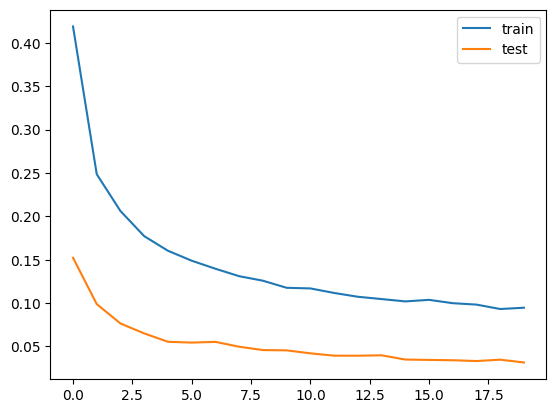

In [67]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = 12
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)


# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(x_train, x_train, epochs=20, batch_size=16, verbose=2, validation_data=(x_test,x_test))
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score


In [ ]:
# define model
model = LogisticRegression()
# fit model on training set
model.fit(x_train, y_train)
# make prediction on test set
yhat = model.predict(x_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.7845092024539877


In [ ]:
# define model
model = LogisticRegression()
# fit model on training set
model.fit(x_train, y_train)
# make prediction on test set
yhat = model.predict(x_test)
# calculate accuracy
acc = recall_score(y_test, yhat)
print(acc)

0.8103579588728104


In [ ]:
# encode the train data
X_train_encode = encoder.predict(x_train)
# encode the test data
X_test_encode = encoder.predict(x_test)

In [ ]:
# define the model
model1 = LogisticRegression()
# fit the model on the training set
model1.fit(X_train_encode,y_train)
# make predictions on the test set
yhat = model1.predict(X_test_encode)>0.5
print(accuracy_score(y_test,yhat))

0.7699386503067485


In [ ]:
# define the model
model1 = LogisticRegression()
# fit the model on the training set
model1.fit(X_train_encode,y_train)
# make predictions on the test set
yhat = model1.predict(X_test_encode)>0.5
print(recall_score(y_test,yhat))

0.785986290936786


In [ ]:
test.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True'],
      dtype='object')

In [ ]:
model_predict4=model1.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras


In [ ]:
model23= keras.Sequential()

In [ ]:
print(x_train.shape)

(6085, 12)


In [ ]:
model23= keras.Sequential()
model23.add(Dense(10, activation='sigmoid',input_shape=(12,)))
model23.add(Dense(5,activation='sigmoid'))
model23.add(Dense(1,activation='sigmoid'))

In [ ]:
model23.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
result23=model23.fit(x_train,y_train,batch_size=10,epochs=20)

Epoch 1/20
609/609 [==============================] - 1s 967us/step - loss: 0.7032 - accuracy: 0.5071
Epoch 2/20
609/609 [==============================] - 1s 979us/step - loss: 0.6902 - accuracy: 0.5612
Epoch 3/20
609/609 [==============================] - 1s 1ms/step - loss: 0.6890 - accuracy: 0.5924
Epoch 4/20
609/609 [==============================] - 1s 971us/step - loss: 0.6876 - accuracy: 0.6353
Epoch 5/20
609/609 [==============================] - 1s 971us/step - loss: 0.6860 - accuracy: 0.5956
Epoch 6/20
609/609 [==============================] - 1s 1ms/step - loss: 0.6840 - accuracy: 0.6467
Epoch 7/20
609/609 [==============================] - 1s 945us/step - loss: 0.6817 - accuracy: 0.6920
Epoch 8/20
609/609 [==============================] - 1s 989us/step - loss: 0.6787 - accuracy: 0.6585
Epoch 9/20
609/609 [==============================] - 1s 979us/step - loss: 0.6750 - accuracy: 0.6846
Epoch 10/20
609/609 [==============================] - 1s 982us/step - loss: 0.6704 - 

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

def get_predictions(model,x_train,x_test,y_train,y_test):
  model=model.fit(x_train,y_train)
  train_preds=model.predict(x_train)>0.5
  test_preds=model.predict(x_test)>0.5


  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))





In [ ]:
train_preds=model23.predict(x_train)>0.5

In [ ]:
train_preds=model23.predict(x_train)>0.5
test_preds=model23.predict(x_test)>0.5

In [ ]:

  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))

[[2278  742]
 [ 543 2522]]
0.7888249794576828
0.8228384991843393
0.772671568627451
[[ 945  350]
 [ 235 1078]]
0.7756901840490797
0.821020563594821
0.7549019607843137


In [ ]:
ann_testdata_predict=model23.predict(test)>0.5

In [ ]:
model3=keras.Sequential()
model3.add(Dense(50, activation='sigmoid',input_shape=(12,)))
model3.add(Dense(30,activation='sigmoid'))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_train.shape

(6085, 12)

In [ ]:
result_multi=model3.fit(x_train,y_train,batch_size=25,epochs=20)

Epoch 1/20
244/244 [==============================] - 1s 1ms/step - loss: 0.7004 - accuracy: 0.4942
Epoch 2/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5298
Epoch 3/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5499
Epoch 4/20
244/244 [==============================] - 0s 997us/step - loss: 0.6868 - accuracy: 0.5569
Epoch 5/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5768
Epoch 6/20
244/244 [==============================] - 0s 992us/step - loss: 0.6829 - accuracy: 0.6222
Epoch 7/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6225
Epoch 8/20
244/244 [==============================] - 0s 982us/step - loss: 0.6778 - accuracy: 0.6493
Epoch 9/20
244/244 [==============================] - 0s 999us/step - loss: 0.6749 - accuracy: 0.6524
Epoch 10/20
244/244 [==============================] - 0s 999us/step - loss: 0.6720 - accura

In [ ]:
test_preds=model3.predict(x_test)>0.5
test_preds=model3.predict(x_test)>0.5

In [ ]:

  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))

[[2278  742]
 [ 543 2522]]
0.7888249794576828
0.8228384991843393
0.772671568627451
[[ 807  488]
 [ 171 1142]]
0.7473159509202454
0.8697638994668697
0.7006134969325153


In [ ]:
model5=keras.Sequential()
model5.add(Dense(60, activation='sigmoid',input_shape=(12,)))
model5.add(Dense(40,activation='sigmoid'))
model5.add(Dense(1,activation='sigmoid'))
model5.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
result_multi=model5.fit(x_train,y_train,batch_size=25,epochs=20)

Epoch 1/20
244/244 [==============================] - 1s 996us/step - loss: 0.6944 - accuracy: 0.4919
Epoch 2/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5356
Epoch 3/20
244/244 [==============================] - 0s 989us/step - loss: 0.6873 - accuracy: 0.5862
Epoch 4/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6062
Epoch 5/20
244/244 [==============================] - 0s 983us/step - loss: 0.6809 - accuracy: 0.6684
Epoch 6/20
244/244 [==============================] - 0s 994us/step - loss: 0.6774 - accuracy: 0.6873
Epoch 7/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6874
Epoch 8/20
244/244 [==============================] - 0s 992us/step - loss: 0.6700 - accuracy: 0.7213
Epoch 9/20
244/244 [==============================] - 0s 976us/step - loss: 0.6656 - accuracy: 0.7326
Epoch 10/20
244/244 [==============================] - 0s 988us/step - loss: 0.6608 - ac

In [ ]:
test_preds=model5.predict(x_test)>0.5
test_preds=model5.predict(x_test)>0.5

In [ ]:

  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))

[[2278  742]
 [ 543 2522]]
0.7888249794576828
0.8228384991843393
0.772671568627451
[[ 925  370]
 [ 217 1096]]
0.7749233128834356
0.8347296268088348
0.747612551159618


In [ ]:
model6=keras.Sequential()
model6.add(Dense(40, activation='sigmoid',input_shape=(12,)))
model6.add(Dense(40,activation='sigmoid'))
model6.add(Dense(1,activation='sigmoid'))
model6.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
result_multi=model6.fit(x_train,y_train,batch_size=25,epochs=20)

Epoch 1/20
244/244 [==============================] - 1s 970us/step - loss: 0.6962 - accuracy: 0.4851
Epoch 2/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5275
Epoch 3/20
244/244 [==============================] - 0s 991us/step - loss: 0.6891 - accuracy: 0.5696
Epoch 4/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6113
Epoch 5/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6416
Epoch 6/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6480
Epoch 7/20
244/244 [==============================] - 0s 971us/step - loss: 0.6782 - accuracy: 0.6950
Epoch 8/20
244/244 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.7075
Epoch 9/20
244/244 [==============================] - 0s 996us/step - loss: 0.6713 - accuracy: 0.7103
Epoch 10/20
244/244 [==============================] - 0s 964us/step - loss: 0.6677 - accura

In [ ]:
test_preds=model6.predict(x_test)>0.5
test_preds=model6.predict(x_test)>0.5

In [ ]:

  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))

[[2278  742]
 [ 543 2522]]
0.7888249794576828
0.8228384991843393
0.772671568627451
[[ 927  368]
 [ 241 1072]]
0.7664877300613497
0.8164508758568164
0.7444444444444445


In [ ]:
ann_predict=model6.predict(test)

In [ ]:
ann_testdata_predict=model23.predict(test)>0.5

In [ ]:
ann_testdata_predict

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
test_ann=pd.read_csv('/content/drive/MyDrive/own_data/spaceship_test.csv')

In [ ]:
test_ann['Transported']=ann_testdata_predict

In [ ]:
test_ann['PassengerId'] = test_ann['PassengerId'].astype(str)
test_ann = test_ann[['PassengerId', 'Transported']]
test_ann= test_ann.rename(columns={'PassengerId': 'PassengerId', 'Transported': 'Transported'})

In [ ]:
test_ann

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
test_ann['Transported']=round(test_ann['Transported'])

In [ ]:
test_ann

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,1.0
...,...,...
4272,9266_02,1.0
4273,9269_01,0.0
4274,9271_01,1.0
4275,9273_01,1.0


In [ ]:
test_ann.Transported = test_ann.Transported.map({0 : False, 1 : True})
#x in test_ann['Transported']


In [ ]:
test_ann

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
##

mnist dataset

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
from PIL.ExifTags import TAGS

In [70]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [71]:
x_train.shape

(60000, 28, 28)

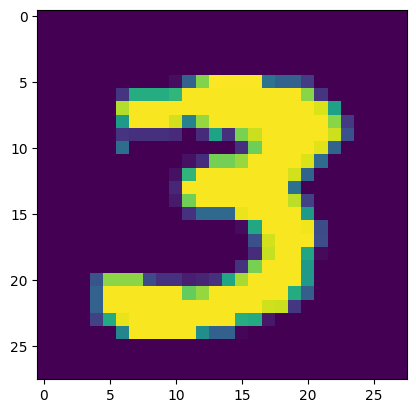

In [72]:
plt.imshow(x_train[27])

In [73]:
y_train[27]

3

In [74]:
x_train=x_train / 255
x_test=x_test/255

In [75]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [78]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2694 - accuracy: 0.9246
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1229 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0859 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0663 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0511 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0410 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 

In [79]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9751


[0.09001077711582184, 0.9750999808311462]

In [80]:
x_train=x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [81]:
x_test=x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [82]:
#cnn

In [83]:
model = keras.Sequential([
    layers.Conv2D(30, (3,3),activation ='relu' , input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 30)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5070)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               507100    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
________________________________________________

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1592 - accuracy: 0.9530
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0538 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0363 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0237 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0165 - accuracy: 0.9946


In [87]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0425 - accuracy: 0.9872


[0.042488157749176025, 0.9872000217437744]